# Demo: Segmentação

### Entrada: Imagen de uma folha
### Salida: Imagen contendo apenas as partes danificadas

##### Importando bibliotecas

In [1]:
import os
import sys

sys.path.append('C:/Users/nineil/Desktop/Jeffri/USP/Procesamiento de Imagenes/Proyecto_PI/Relatorio Final/Codigo')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio 
import libreria as lib

### Parte 1 - Segmentação con o fundo da imagen

In [3]:
cad = "C:/Users/nineil/Desktop/prueba.jpg" # leitura do nome da imagen

I = imageio.imread(cad)

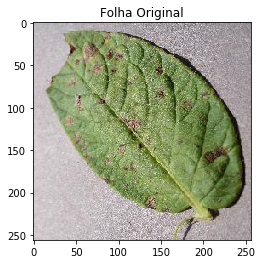

In [4]:
plt.imshow(I)
plt.title('Folha Original')
plt.show()

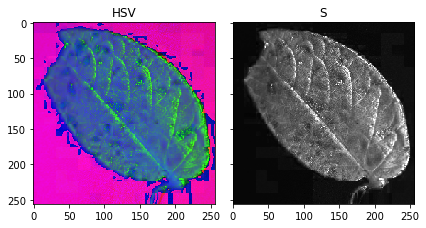

In [5]:
# Convertendo a imagem para o espaço de cores do HSV
HSV = lib.rgb2hsv(I)
# Extraindo o canal de cor Saturação
V = HSV[:,:,1]

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(6, 5))
        
ax[0].imshow(HSV, cmap=plt.cm.gray)
ax[0].set_title('HSV')
        
ax[1].imshow(V, cmap=plt.cm.gray)
ax[1].set_title('S')

plt.tight_layout()
plt.show()


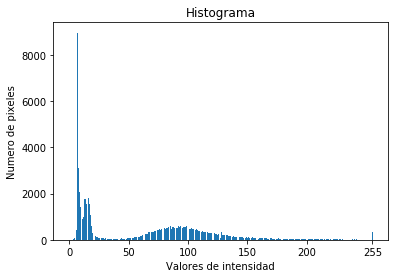

In [6]:
# Aplicaremos Otsu en el espaço de cor HSV no canal de Saturação
H,bin_c = np.histogram(V,256) # Calculando o histogram
bin_c = (bin_c[:-1] + bin_c[1:]) / 2. # Operacão para poder computar
lib.graficar(H)
# Histograma proximo a uma distribução bimodal

In [7]:
thresh = lib.Otsu(V)
print(thresh)

0.240234375


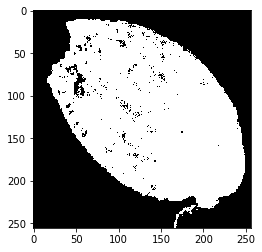

In [8]:
mask = V > thresh
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()

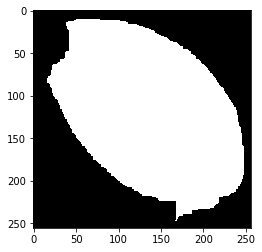

In [9]:
#fazendo unas operações morfologicas
mask = lib.bin_closing(mask,np.ones((18,18))) 
mask = lib.fill_holes(mask,lib.generate()) 
plt.imshow(mask, cmap=plt.cm.gray)
plt.show()

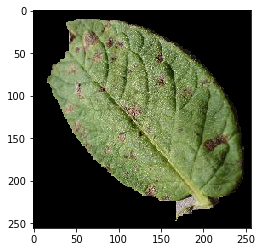

In [10]:
#Aplicando máscara com a imagen original
I2 = I.copy()
I2[:,:,0] = I2[:,:,0] * mask
I2[:,:,1] = I2[:,:,1] * mask
I2[:,:,2] = I2[:,:,2] * mask
plt.imshow(I2)
plt.show()

### Parte 2 - Segmentação das áreas verdes da folha

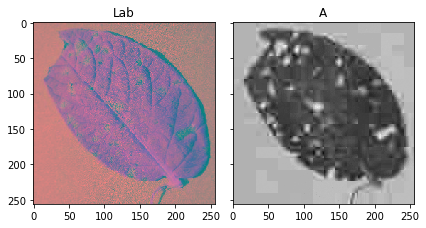

In [11]:
# Convertendo a imagem para o espaço de cores l*a*b*
lab = lib.rgb2lab(I)
lab = (lab + [0, 128, 128]) / [100, 255, 255]
# Extraindo o canal de cor a*
A = lab[:,:,1]

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(6, 5))
        
ax[0].imshow(lab, cmap=plt.cm.gray)
ax[0].set_title('Lab')
        
ax[1].imshow(A, cmap=plt.cm.gray)
ax[1].set_title('A')

plt.tight_layout()
plt.show()

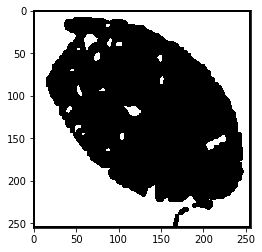

In [12]:
# Fazendo operaçoes morfologicas e umbralização
mask2 = lib.bin_erosion(lib.bin_closing(A > 0.49, np.ones((3,3))),lib.generate()) 
plt.imshow(mask2, cmap=plt.cm.gray)
plt.show()

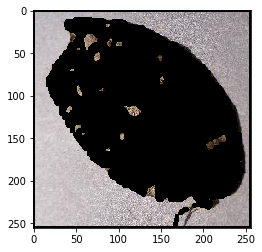

In [13]:
#Aplicando máscara com a imagen original
I2 = lib.segmenta(I.copy(),mask2)
plt.imshow(I2)
plt.show()

### Segmentação Final

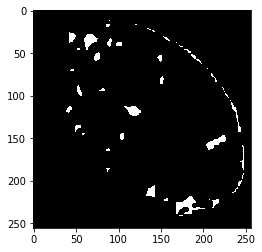

In [14]:
# combinando as 2 máscaras
M = mask * mask2
plt.imshow(M, cmap=plt.cm.gray)
plt.show()

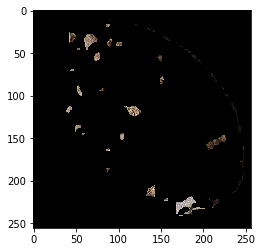

In [16]:
Iresult = lib.segmenta(I.copy(),M)
plt.imshow(Iresult,cmap=plt.cm.gray)
plt.show()